## Monty Hall Problem

You are playing a TV game show and are shown 2 doors. One has a car behind it, the other a goat. What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats. The game show host asks you to pick a door, but not to open it yet. Then the host opens one of the other two doors (that you did not pick) and that has a goat. The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
- Now a third player comes in who has not seen what happened earlier. They pick a door.
Which of the three players is most likely to win?


Simulate three doors, one car, and two goats.
Simulate three players: the switcher, the conservative, and the newcomer.
Record who wins.
Repeat it many times.
Which player do you want to be?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1 - 2 doors

In [3]:
car = np.random.randint(0, 2, size=None, dtype=int)
print(car)

1


In [4]:
wincount = 0

for i in range(1000):
    pick = np.random.randint(0, 2, size=None, dtype=int)
    #print(pick)
    if pick == car:
        wincount += 1

print(wincount/1000)


0.545


### 3 doors

In [5]:
car = np.random.randint(0, 3, size=None, dtype=int) #car position between 0,1,2
print(car)

2


In [ ]:
ndoors = 3

keeper = 0
switcher = 0
later = 0

tries = 10000

for i in range(tries):
    keep_pick = np.random.randint(0, ndoors, size=None, dtype=int) #pick position between 0,1,2

    choices = np.linspace(0,ndoors-1,ndoors,dtype=int).tolist()

    later_choices = choices.copy()

    choices.remove(keep_pick)

    switch_choice = choices.copy()
    
    if car != keep_pick:
        choices.remove(car)

    host_pick = np.random.choice(choices)

    switch_choice.remove(host_pick)
    switch_pick = switch_choice[0]

    later_choices.remove(host_pick)
    later_pick = np.random.choice(later_choices)

    if keep_pick == car:
        keeper += 1
    if  switch_pick == car:
        switcher += 1
    if later_pick == car:
        later += 1

    

print('probability of winning when keeping the same door',keeper/tries)
print('probability of winning when switching the door',switcher/tries)
print('probability of winning when a door is already opened',later/tries)



0.332
0.668
0.4986


### N doors, 1 opened

N doors to choose form, the presenter opens 1 of them. Probability of winning as function of N

In [7]:
ndoors = 100

keeper = np.zeros(ndoors)
switcher = np.zeros(ndoors)
later = np.zeros(ndoors)

tries = 1000

for d in range(3, ndoors):

    for i in range(tries):
        car = np.random.randint(0, d, size=None, dtype=int) #car position between 0,d
        keep_pick = np.random.randint(0, d, size=None, dtype=int) #pick position between 0,d

        choices = np.linspace(0,d-1,d,dtype=int).tolist()

        later_choices = choices.copy()

        choices.remove(keep_pick)

        switch_choice = choices.copy()
        
        if car != keep_pick:
            choices.remove(car)

        host_pick = np.random.choice(choices)

        switch_choice.remove(host_pick)
        switch_pick = np.random.choice(switch_choice)

        later_choices.remove(host_pick)
        later_pick = np.random.choice(later_choices)

        if keep_pick == car:
            keeper[d] += 1
        if  switch_pick == car:
            switcher[d] += 1
        if later_pick == car:
            later[d] += 1


Text(0.5, 1.0, 'x doors, 1 opened')

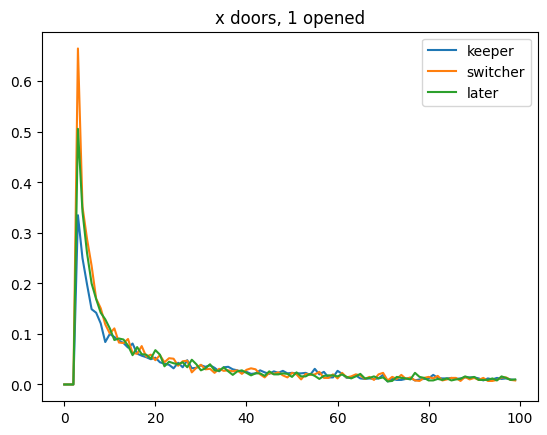

In [ ]:
doors_x = np.linspace(0, ndoors-1, ndoors, dtype=int)
plt.plot(keeper/tries, label='keeper')
plt.plot(switcher/tries, label='switcher')
plt.plot(later/tries, label='later')
plt.xlabel('number of doors')
plt.ylabel('probability of winning')
plt.legend()
plt.title('x doors, 1 opened')

### N doors, p opened

N doors to choose form, the presenter opens p <= N of them. Probability of winning as function of p

In [9]:
ndoors = 100

keeper = np.zeros(ndoors)
switcher = np.zeros(ndoors)
later = np.zeros(ndoors)

car = np.random.randint(0, ndoors, size=None, dtype=int) #car position between 0,ndoors

tries = 1000

for d in range(1, ndoors-1):

    for i in range(tries):
        keep_pick = np.random.randint(0, ndoors, size=None, dtype=int) #pick position between 0,1,2

        choices = np.linspace(0,ndoors-1,ndoors,dtype=int).tolist()

        later_choices = choices.copy()

        choices.remove(keep_pick)

        switch_choice = choices.copy()
        
        if car != keep_pick:
            choices.remove(car)

        host_pick = np.zeros(d, dtype=int)

        for h in range(d):
            host_pick[h] = np.random.choice(choices)
            choices.remove(host_pick[h])

        for h in range(d):
            switch_choice.remove(host_pick[h])
            later_choices.remove(host_pick[h])
        
        later_pick = np.random.choice(later_choices)
        switch_pick = np.random.choice(switch_choice)

        if keep_pick == car:
            keeper[d] += 1
        if  switch_pick == car:
            switcher[d] += 1
        if later_pick == car:
            later[d] += 1



Text(0.5, 1.0, '100 doors, x opened')

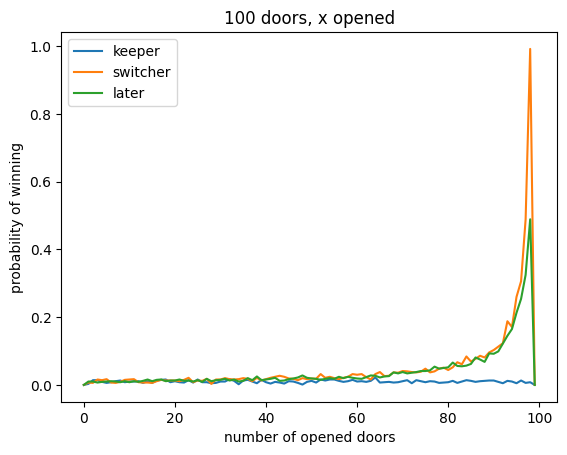

In [10]:
open_doors_x = np.linspace(0, ndoors-1, ndoors, dtype=int)
plt.plot(keeper/tries, label='keeper')
plt.plot(switcher/tries, label='switcher')
plt.plot(later/tries, label='later')
plt.xlabel('number of opened doors')
plt.ylabel('probability of winning')
plt.legend()
plt.title('100 doors, x opened')